# Here we have a simple activity with two main goals:


1.   Perform a image conversion from RGB to grayscale; and
2.   Perform a image binarization.

The activity requested the usage of Python and "No library" was allowed... Well, we could try to open the file using something like:


In [6]:
filename = 'my_guitar.jpeg' # you can change this file to another RBG image as you wish

In [4]:
with open (filename, 'rb') as stuff:
  data = stuff.read()

print(data)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x06@\x03\x84\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1a\x00\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfb\x81\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\xc0\xb0\x00\x05\x00\x10\x00\x00\xa8Z\x00\x00\x00\x11e>_\xce\xf5y\x17Y\xb9MgTcY5\xbcR}\xef\x87\xf71\xaf\x17\xd5\xf9\xbfKR\nJH\x15) \x00\x80\x80\x92\xc2jS\xf3\xfe~\xdc*\x03\xee\xfd\x1f\x07\xbe9\xf9}^S6R\xeb:\xabe\x8a\n\x0e\

But this kind of data doesn't help us at all, 'cause we can only read ('rb') and write ('wb') the file, but cannot manipulate its pixels.


So, for this activity, "no libraries allowed" will be interpreted as follows:


*   No libraries that perform the transformations directly are allowed (cv2, pillow...), but we can use libraries that manipulate matrices like Numpy and use another library to actually "open" the image itself.

The results will be compared side by side (matrices manipulation and instant convertion with cv2).


---

## Set up

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

---

## Image loading and its data

In [16]:
image = cv2.imread(filename)
type(image)

numpy.ndarray

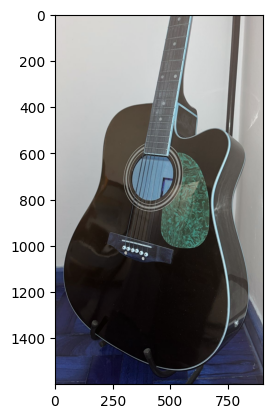

In [40]:
plt.imshow(image)
plt.show()

We have to remember that cv2 works with BGR instead of RGB, thats why the image looks weird (blue floor).

Anyway, now we have a matrix to work with:

In [18]:
image

array([[[219, 214, 211],
        [219, 214, 211],
        [219, 214, 211],
        ...,
        [196, 191, 188],
        [196, 191, 188],
        [196, 191, 188]],

       [[219, 214, 211],
        [219, 214, 211],
        [219, 214, 211],
        ...,
        [196, 191, 188],
        [196, 191, 188],
        [196, 191, 188]],

       [[219, 214, 211],
        [219, 214, 211],
        [219, 214, 211],
        ...,
        [196, 191, 188],
        [196, 191, 188],
        [196, 191, 188]],

       ...,

       [[ 49,  53,  88],
        [ 49,  53,  88],
        [ 51,  53,  87],
        ...,
        [ 60,  55,  70],
        [ 61,  56,  71],
        [ 63,  58,  73]],

       [[ 49,  53,  88],
        [ 49,  53,  88],
        [ 52,  54,  88],
        ...,
        [ 60,  55,  70],
        [ 61,  56,  71],
        [ 62,  57,  72]],

       [[ 49,  53,  88],
        [ 50,  54,  89],
        [ 52,  54,  88],
        ...,
        [ 60,  55,  70],
        [ 61,  56,  71],
        [ 61,  56,  71]]

In [20]:
image.shape

(1600, 900, 3)

---

## Converting to grayscale

Consulting the function to perform this conversion at [OpenCV](https://docs.opencv.org/4.x/dc/d38/group__gapi__colorconvert.html#ga3e8fd8197ab16811caf9b31cb1e08a05), we can see that the gray color value is obtained throught the following function:

$$ dst(I) = 0.114*src(I).B + 0.587*src(I).G + 0.299*src(I).R$$

So, lets do it:

In [24]:
B = image[:,:,0]
G = image[:,:,1]
R = image[:,:,2]

B = 0.114 * B
G = 0.587 * G
R = 0.299 * R

image_gray = B + G + R

In [32]:
gray_cv2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #cv2 usage for comparision purposes

Text(0.5, 1.0, 'Done with cv2')

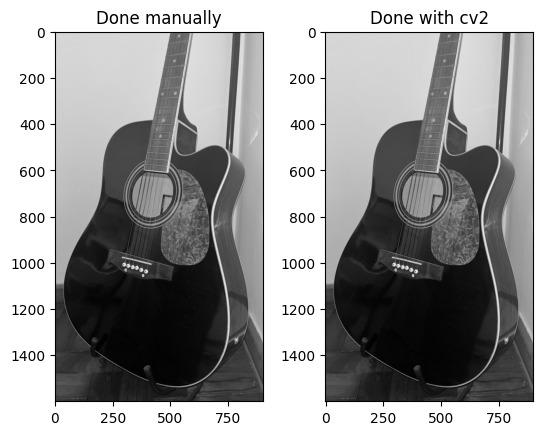

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2)


ax1.imshow(image_gray, cmap='gray')
ax1.set_title("Done manually")

ax2.imshow(gray_cv2, cmap='gray')
ax2.set_title("Done with cv2")

It looks similar, and now we have a single channel image:

In [39]:
image_gray.shape

(1600, 900)

---

## Binarization

Here we will perform the simplest threshold because there is no specification of which one should be used in the activity.

Since our image has 8 bits, we will stablish the threshold at the middle: 127.

So each value will be like this [[1]](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59):

\begin{align}
  \text{dst}(x, y) =
  \begin{cases}
  \text{maxval} & \text{if } \text{src}(x, y) > \text{thresh} \\
  0 & \text{otherwise}
  \end{cases}
\end{align}





In [43]:
binary_image = image_gray

binary_image[binary_image >= 127] = 255
binary_image[binary_image < 127] = 0

In [49]:
(thresh, binary_cv2) = cv2.threshold(gray_cv2, 127, 255, cv2.THRESH_BINARY) #cv2 usage for comparision purposes

Text(0.5, 1.0, 'Done with cv2')

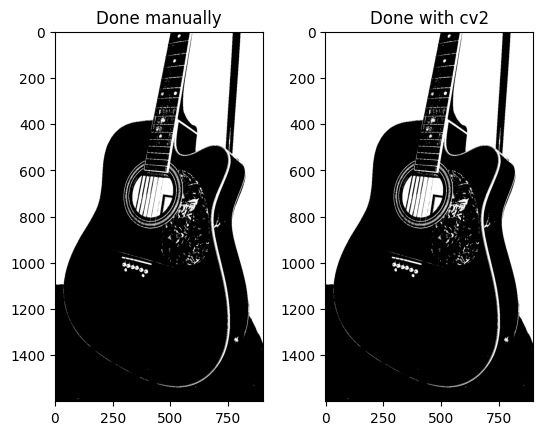

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2)


ax1.imshow(binary_image, cmap='gray')
ax1.set_title("Done manually")

ax2.imshow(binary_cv2, cmap='gray')
ax2.set_title("Done with cv2")